In [8]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  


In [9]:
# Load the dataset
df = pd.read_csv("abalone.csv")

#drop the sex features b/c there is no corr
df = df.drop('Sex', axis=1)

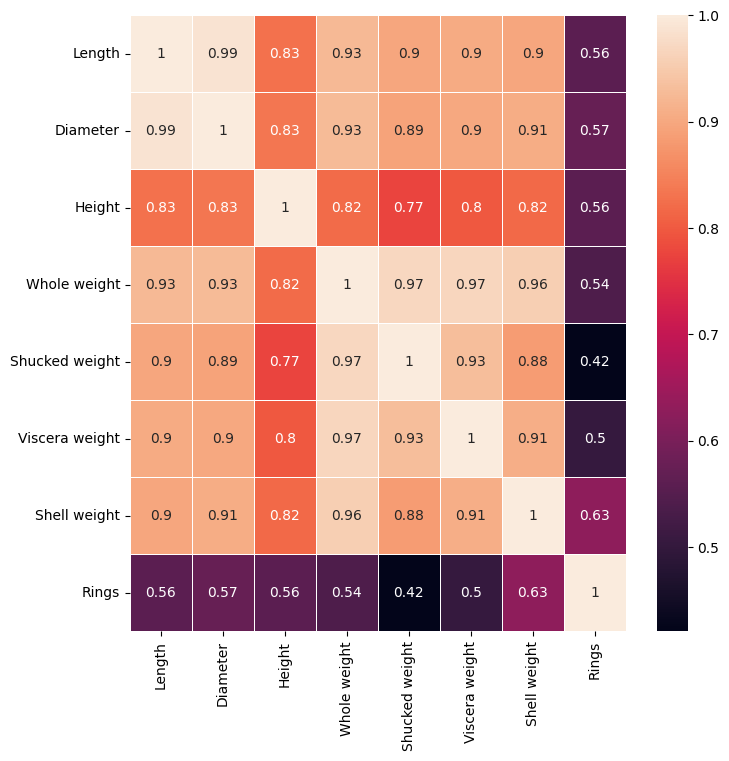

In [10]:
fig, axes = plt.subplots(figsize=(8, 8)) 
sns.heatmap(data=df.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

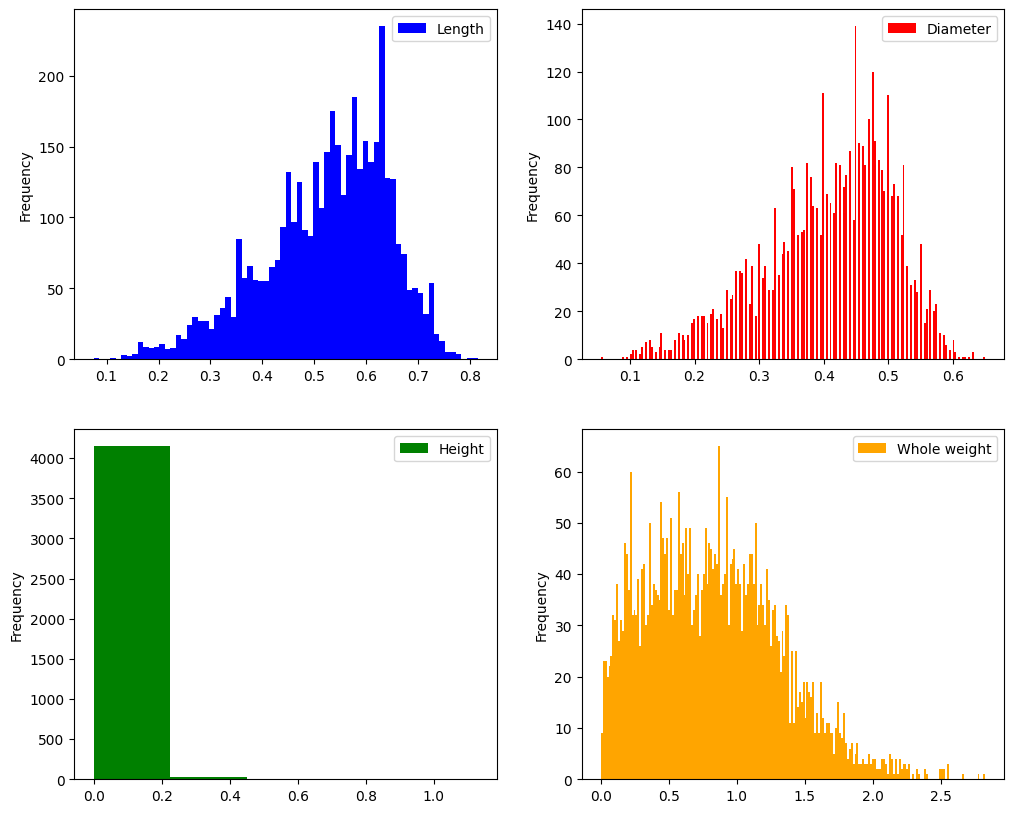

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="Length", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="Diameter", bins=200, color="r", ax=axes[0][1])
df.plot(kind="hist", y="Height", bins=5, color="g", ax=axes[1][0])
df.plot(kind="hist", y="Whole weight", bins=200, color="orange", ax=axes[1][1])
plt.show()

In [12]:
# Define features and target
X = df.drop(["Rings"], axis=1) 
y = df["Rings"].values

# Train-test split
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Train model
from sklearn.linear_model import LinearRegression
multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [13]:
# Predict and evaluate
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

y_pred_MLR_train = multiple_linear_reg.predict(x_train)
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for Multiple Linear Regression Model:  0.5105963473051489
Testing Accuracy for Multiple Linear Regression Model:  0.5194880708533776
RMSE for Training Data:  2.2318973212055275
RMSE for Testing Data:  2.3220981723861267


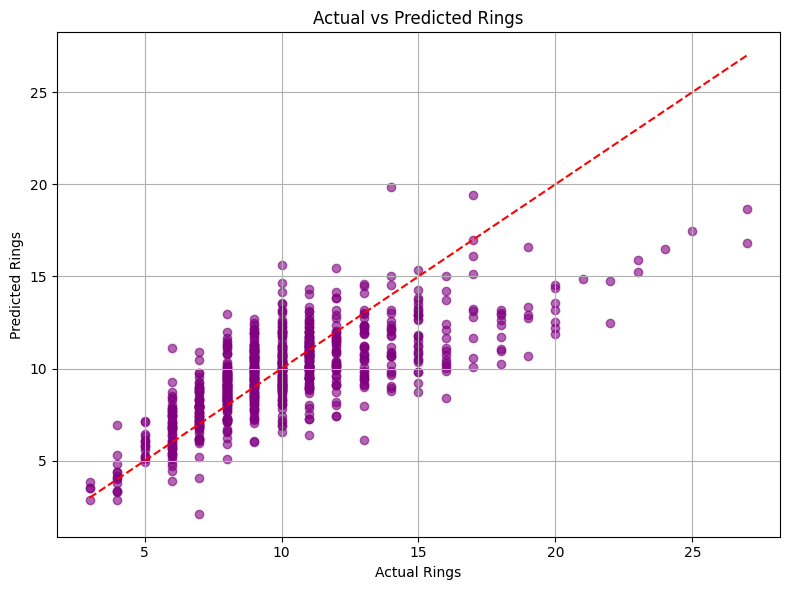

In [14]:
# Plot Actual vs Predicted Rings for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_MLR_test, alpha=0.6, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Rings")
plt.ylabel("Predicted Rings")
plt.title("Actual vs Predicted Rings")
plt.grid(True)
plt.tight_layout()
plt.show()
